In [55]:
from jack_the_dog.socks_env import SocksGridEnv, ACTION
from jack_the_dog.episode_length_wrapper import EpisodeLengthWrapper
from jack_the_dog.auto_socks_wrapper import AutoSocksWrapper
from jack_the_dog.state_index_wrapper import StateIndexWrapper
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output


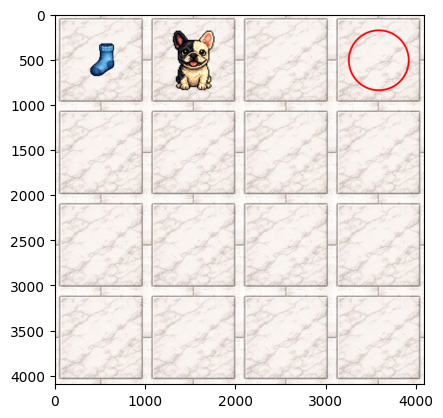

In [56]:
env = SocksGridEnv(use_trash=False, use_snacks=False)
env = AutoSocksWrapper(env)
env = EpisodeLengthWrapper(env, max_episode_steps=20)

obs, info = env.reset()
image = env.render()
plt.imshow(image)
plt.show()





In [57]:
n_observation_space = len(env.get_all_states())
n_action_space = len(env.get_possible_actions(env.get_all_states()[0])) 


/Users/zoya/miniconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_all_states to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_all_states` for environment variables or `env.get_wrapper_attr('get_all_states')` that will search the reminding wrappers.
  logger.warn(
/Users/zoya/miniconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_possible_actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_possible_actions` for environment variables or `env.get_wrapper_attr('get_possible_actions')` that will search the reminding wrappers.
  logger.warn(


In [58]:
import torch
import torch.nn as nn
from collections import deque

In [ ]:
# TODO: refactor hidden_dims and make it more clear (typing and so on)
def create_network(input_dim, hidden_dims, output_dim):
    # network = nn.Sequential(
    #    torch.nn.Linear(input_dim, ...),
    #    torch.nn.ReLU(),
    #    ...
    # )
    """<codehere>"""

    """</codehere>"""
    return network

In [ ]:
def select_action_eps_greedy(network, state, epsilon):
    """Выбирает действие epsilon-жадно."""
    if not isinstance(state, torch.Tensor):
        state = torch.tensor(state, dtype=torch.float32)
    Q_s = network(state).detach().numpy()

    # action =
    """<codehere>"""

    """</codehere>"""

    action = int(action)
    return action

Будем приближать Q-функцию агента, минимизируя среднеквадратичную TD-ошибку:
$$
\delta = Q_{\theta}(s, a) - [r(s, a) + \gamma \cdot max_{a'} Q_{-}(s', a')] \\
L = \frac{1}{N} \sum_i \delta_i^2,
$$
где
* $s, a, r, s'$ состояние, действие, вознаграждение и следующее состояние
* $\gamma$ дисконтирующий множитель.

Основная тонкость состоит в использовании $Q_{-}(s',a')$. Это та же самая функция, что и $Q_{\theta}$, которая является выходом нейронной сети, но при обучении сети, мы не пропускаем через эти слои градиенты. В статьях можно обнаружить следующее обозначение для остановки градиента: $SG(\cdot)$.

In [ ]:
def compute_td_loss(
        network, states, actions, rewards, next_states, is_done, gamma=0.99, check_shapes=False, regularizer=.1
):
    """ Считатет td ошибку, используя лишь операции фреймворка torch. Используйте формулу выше. """

    # переводим входные данные в тензоры
    states = torch.tensor(np.array(states), dtype=torch.float32)    # shape: [batch_size, state_size]
    actions = torch.tensor(actions, dtype=torch.long)     # shape: [batch_size]
    rewards = torch.tensor(rewards, dtype=torch.float32)  # shape: [batch_size]


    next_states = torch.tensor(np.array(next_states), dtype=torch.float32) # shape: [batch_size, state_size]
    is_done = torch.tensor(is_done, dtype=torch.bool)    # shape: [batch_size]

    # получаем значения q для всех действий из текущих состояний
    predicted_qvalues = network(states)

    # получаем q-values для выбранных действий
    predicted_qvalues_for_actions = predicted_qvalues[range(states.shape[0]), actions]

    # применяем сеть для получения q-value для следующих состояний (next_states)
    # predicted_next_qvalues =
    """<codehere>"""
    """</codehere>"""

    # вычисляем V*(next_states), что соответствует max_{a'} Q(s',a')
    # next_state_values =
    """<codehere>"""
    """</codehere>"""

    assert next_state_values.dtype == torch.float32

    # вычисляем target q-values для функции потерь
    #  target_qvalues_for_actions =
    """<codehere>"""
    """</codehere>"""

    # для последнего действия в эпизоде используем
    # упрощенную формулу Q(s,a) = r(s,a),
    # т.к. s' для него не существует
    target_qvalues_for_actions = torch.where(is_done, rewards, target_qvalues_for_actions)

    losses = (predicted_qvalues_for_actions - target_qvalues_for_actions.detach()) ** 2

    # MSE loss для минимизации
    loss = torch.mean(losses)
    # добавляем регуляризацию на значения Q
    loss += regularizer * predicted_qvalues_for_actions.mean()

    if check_shapes:
        assert predicted_next_qvalues.data.dim(
        ) == 2, "убедитесь, что вы предсказали q-значения для всех действий в следующем состоянии"
        assert next_state_values.data.dim(
        ) == 1, "убедитесь, что вы вычислили V (s ') как максимум только по оси действий, а не по всем осям"
        assert target_qvalues_for_actions.data.dim(
        ) == 1, "что-то не так с целевыми q-значениями, они должны быть вектором"

    return loss, losses

### Simple DQN

In [62]:
def generate_session(env, network, opt, t_max=300, epsilon=0, train=False):
    """генерация сессии и обучение"""
    total_reward = 0
    s, _ = env.reset()
    epsilon = epsilon if train else 0.

    for t in range(t_max):
        a = select_action_eps_greedy(network, s, epsilon=epsilon)
        next_s, r, terminated, truncated, _ = env.step(a)
      #  print(next_s)
        if train:
            opt.zero_grad()
            loss, _ = compute_td_loss(network, [s], [a], [r], [next_s], [terminated and not truncated])
            loss.backward()
            opt.step()

        total_reward += r
        s = next_s
        if terminated:
            break

    return total_reward

In [64]:
def test_dqn():
    lr = .0001
    eps, eps_decay = .5, .998
    train_ep_len, eval_schedule = 10000, 100
    eval_rewards = deque(maxlen=5)

    env.reset()
    network = create_network(env.observation_space.shape[0], [128, 128], env.action_space.n)
    opt = torch.optim.Adam(network.parameters(), lr=lr)

    for ep in range(train_ep_len):
        _ = generate_session(env, network, opt, epsilon=eps, train=True)

        if (ep + 1) % eval_schedule == 0:
            ep_rew = generate_session(env, network, opt, epsilon=eps, train=False)
            eval_rewards.append(ep_rew)
            running_avg_rew = np.mean(eval_rewards)
            print("Epoch: #{}\tmean reward = {:.3f}\tepsilon = {:.3f}".format(ep, running_avg_rew, eps))

            if eval_rewards and running_avg_rew >= 0.9:
                print("Принято!")
                break

        eps *= eps_decay
    return network

In [65]:
network = test_dqn()

Epoch: #99	mean reward = 0.000	epsilon = 0.410
Epoch: #199	mean reward = 0.000	epsilon = 0.336
Epoch: #299	mean reward = 0.000	epsilon = 0.275
Epoch: #399	mean reward = 0.250	epsilon = 0.225
Epoch: #499	mean reward = 0.400	epsilon = 0.184
Epoch: #599	mean reward = 0.600	epsilon = 0.151
Epoch: #699	mean reward = 0.800	epsilon = 0.123
Epoch: #799	mean reward = 1.000	epsilon = 0.101
Принято!


In [66]:
s, _ = env.reset()
done = False
while not done:
    a = select_action_eps_greedy(network, s, epsilon=0.12)
    next_s, r, terminated, truncated, _ = env.step(a)
    done = terminated or truncated
    s = next_s
    img = env.render()
    plt.imshow(img)
    plt.show()
    clear_output(True)
    
if terminated:
    print("Good job, Jack!")
else:
    print("Try again!")


Good job, Jack!


## DQN with Experience Replay

Теперь попробуем добавить поддержку памяти прецедентов (Replay Buffer), которая будет из себя представлять очередь из наборов: $\{(s, a, r, s', done)\}$.

Тогда во время обучения каждый новый переход будет добавляться в память, а обучение будет целиком производиться на переходах, просэмплированных из памяти прецедентов.

In [67]:
def sample_batch(replay_buffer, n_samples):
    # sample randomly `n_samples` samples from replay buffer
    # and split an array of samples into arrays: states, actions, rewards, next_actions, dones
    """<codehere>"""
    indices = np.random.choice(len(replay_buffer), n_samples)
    states, actions, rewards, next_actions, dones = [], [], [], [], []
    for i in indices:
        s, a, r, n_s, done = replay_buffer[i]
        states.append(s)
        actions.append(a)
        rewards.append(r)
        next_actions.append(n_s)
        dones.append(done)

    """</codehere>"""

    return np.array(states), np.array(actions), np.array(rewards), np.array(next_actions), np.array(dones)

In [ ]:
def generate_session_rb(
        env, network, opt, replay_buffer, glob_step,
        train_schedule, batch_size,
        t_max=300, epsilon=0, train=False
):
    """генерация сессии и обучение"""
    total_reward = 0
    s, _ = env.reset()
    epsilon = epsilon if train else 0.

    for t in range(t_max):
        a = select_action_eps_greedy(network, s, epsilon=epsilon)
        next_s, r, terminated, truncated, _ = env.step(a)

        if train:
            # put new sample into replay_buffer
            """<codehere>"""
            """</codehere>"""

            if replay_buffer and glob_step % train_schedule == 0:
                # sample new batch: train_batch = ...
                """<codehere>"""
                """</codehere>"""
                states, actions, rewards, next_states, is_done = train_batch

                opt.zero_grad()
                loss, _ = compute_td_loss(network, states, actions, rewards, next_states, is_done)
                loss.backward()
                opt.step()

        glob_step += 1
        total_reward += r
        s = next_s
        if terminated:
            break

    return total_reward, glob_step

После проверки скорости обучения можете поэкспериментировать с различными 

---

`train_schedule`, `batch_size`, а также с размером буфера `replay_buffer`

In [72]:
def test_dqn_replay_buffer():
    lr = .0001
    eps, eps_decay = .5, .998
    train_ep_len, eval_schedule = 10000, 50
    train_schedule, batch_size = 4, 32
    replay_buffer = deque(maxlen=4000)
    eval_rewards = deque(maxlen=5)
    glob_step = 0

    env.reset()
    network = create_network(env.observation_space.shape[0], [128, 128], env.action_space.n)
    opt = torch.optim.Adam(network.parameters(), lr=lr)

    for ep in range(train_ep_len):
        _, glob_step = generate_session_rb(
            env, network, opt, replay_buffer, glob_step, train_schedule, batch_size, epsilon=eps, train=True
        )

        if (ep + 1) % eval_schedule == 0:
            ep_rew, _ = generate_session_rb(
                env, network, opt, replay_buffer, 0, train_schedule, batch_size, epsilon=eps, train=False
            )
            eval_rewards.append(ep_rew)
            running_avg_rew = np.mean(eval_rewards)
            print("Epoch: #{}\tmean reward = {:.3f}\tepsilon = {:.3f}".format(ep, running_avg_rew, eps))

            if eval_rewards and running_avg_rew >= 1.:
                print("Принято!")
                break

        eps *= eps_decay
    return network

In [73]:
network = test_dqn_replay_buffer()

Epoch: #49	mean reward = 0.000	epsilon = 0.453
Epoch: #99	mean reward = 0.000	epsilon = 0.410
Epoch: #149	mean reward = 0.333	epsilon = 0.371
Epoch: #199	mean reward = 0.250	epsilon = 0.336
Epoch: #249	mean reward = 0.400	epsilon = 0.304
Epoch: #299	mean reward = 0.400	epsilon = 0.275
Epoch: #349	mean reward = 0.400	epsilon = 0.249
Epoch: #399	mean reward = 0.400	epsilon = 0.225
Epoch: #449	mean reward = 0.400	epsilon = 0.204
Epoch: #499	mean reward = 0.200	epsilon = 0.184
Epoch: #549	mean reward = 0.200	epsilon = 0.167
Epoch: #599	mean reward = 0.200	epsilon = 0.151
Epoch: #649	mean reward = 0.000	epsilon = 0.136
Epoch: #699	mean reward = 0.200	epsilon = 0.123
Epoch: #749	mean reward = 0.400	epsilon = 0.112
Epoch: #799	mean reward = 0.600	epsilon = 0.101
Epoch: #849	mean reward = 0.600	epsilon = 0.091
Epoch: #899	mean reward = 0.600	epsilon = 0.083
Epoch: #949	mean reward = 0.400	epsilon = 0.075
Epoch: #999	mean reward = 0.400	epsilon = 0.068
Epoch: #1049	mean reward = 0.400	epsilon =

In [74]:
s, _ = env.reset()
done = False
while not done:
    a = select_action_eps_greedy(network, s, epsilon=0.12)
    next_s, r, terminated, truncated, _ = env.step(a)
    done = terminated or truncated
    s = next_s
    img = env.render()
    plt.imshow(img)
    plt.show()
    clear_output(True)
    
if terminated:
    print("Good job, Jack!")
else:
    print("Try again!")


Good job, Jack!


## DQN with Prioritized Experience Replay

Добавим каждому переходу, хранящемуся в памяти, значение приоритета. Популярным вариантом является абсолютное значение TD-ошибки.

Однако, нужно помнить, что это значение быстро устаревает, если его не обновлять. Но и обновлять для всей памяти каждый раз - накладно. Приходится искать баланс между точностью и скоростью.

Здесь мы будем делать следующее:

- использовать TD-ошибку в кач-ве приоритета
- после использования батча при обучении, обновляем значения приоритета для этого батча в памяти
- будем периодически сортировать память для того, чтобы новые переходы заменяли собой те переходы, у которых наименьшие значения ошибки (т.е. наименьший приоритет)

In [ ]:
def softmax(xs, temp=1000.):
    if not isinstance(xs, np.ndarray):
        xs = np.array(xs)

    # Обрати внимание, насколько большая температура по умолчанию!
    exp_xs = np.exp((xs - xs.max()) / temp)
    return exp_xs / exp_xs.sum()

def sample_prioritized_batch(replay_buffer, n_samples):
    # Sample randomly `n_samples` samples from replay buffer weighting by priority (sample's loss)
    # and split an array of samples into arrays: states, actions, rewards, next_actions, dones
    # Also, keep samples' indices (into `indices`) to return them too!
    """<codehere>"""

    """</codehere>"""

    batch = np.array(states), np.array(actions), np.array(rewards), np.array(next_actions), np.array(dones)
    return batch, indices

def update_batch(replay_buffer, indices, batch, new_losses):
    """Updates batches with corresponding indices replacing their loss value."""
    states, actions, rewards, next_states, is_done = batch

    for i in range(len(indices)):
        new_batch = new_losses[i], states[i], actions[i], rewards[i], next_states[i], is_done[i]
        replay_buffer[indices[i]] = new_batch

def sort_replay_buffer(replay_buffer):
    """Sorts replay buffer to move samples with lesser loss to the beginning
    ==> they will be replaced with the new samples earlier."""
    new_rb = deque(maxlen=replay_buffer.maxlen)
    new_rb.extend(sorted(replay_buffer, key=lambda sample: sample[0]))
    return new_rb

In [ ]:
def generate_session_prioritized_rb(
        env, network, opt, replay_buffer, glob_step,
        train_schedule, batch_size,
        t_max=300, epsilon=0, train=False
):
    """генерация сессии и обучение"""
    total_reward = 0
    s, _ = env.reset()
    epsilon = epsilon if train else 0.

    for t in range(t_max):
        a = select_action_eps_greedy(network, s, epsilon=epsilon)
        next_s, r, terminated, truncated, _ = env.step(a)

        if train:
            # Compute new sample loss (it's the second returning value - `losses` - from compute_td_loss)
            # we need `losses.numpy()[0]`
            with torch.no_grad():
                """<codehere>"""

                """</codehere>"""

            # put new sample into replay_buffer
            """<codehere>"""
    
            """</codehere>"""

            if len(replay_buffer) >= batch_size and (glob_step + 1) % train_schedule == 0:
                # sample new batch: train_batch, indices = ...
                """<codehere>"""
                train_batch, indices = sample_prioritized_batch(replay_buffer, batch_size)
                """</codehere>"""
                states, actions, rewards, next_states, is_done = train_batch

                opt.zero_grad()
                loss, _ = compute_td_loss(network, states, actions, rewards, next_states, is_done)
                loss.backward()
                opt.step()

                with torch.no_grad():
                    # compute updated losses for the training batch and update batch in replay buffer
                    """<codehere>"""
     
                    """</codehere>"""

            # periodically re-sort replay buffer to prioritize replacing with new samples those samples
            # that have the least loss
            if len(replay_buffer) >= batch_size and (glob_step + 1) % 25*train_schedule == 0:
                replay_buffer = sort_replay_buffer(replay_buffer)

        glob_step += 1
        total_reward += r
        s = next_s
        if terminated:
            break

    return total_reward, glob_step

In [82]:
def test_dqn_prioritized_replay_buffer():
    lr = .0001
    eps, eps_decay = .5, .998
    train_ep_len, eval_schedule = 10000, 50
    train_schedule, batch_size = 4, 32
    replay_buffer = deque(maxlen=4000)
    eval_rewards = deque(maxlen=5)
    glob_step = 0

    env.reset()
    network = create_network(env.observation_space.shape[0], [128, 128], env.action_space.n)
    opt = torch.optim.Adam(network.parameters(), lr=lr)

    for ep in range(train_ep_len):
        _, glob_step = generate_session_prioritized_rb(
            env, network, opt, replay_buffer, glob_step, train_schedule, batch_size, epsilon=eps, train=True
        )

        if (ep + 1) % eval_schedule == 0:
            ep_rew, _ = generate_session_prioritized_rb(
                env, network, opt, replay_buffer, 0, train_schedule, batch_size, epsilon=eps, train=False
            )
            eval_rewards.append(ep_rew)
            running_avg_rew = np.mean(eval_rewards)
            print("Epoch: #{}\tmean reward = {:.3f}\tepsilon = {:.3f}".format(ep, running_avg_rew, eps))

            if eval_rewards and running_avg_rew >= 1.:
                print("Принято!")
                break

        eps *= eps_decay
    return network

In [83]:
network = test_dqn_prioritized_replay_buffer()

Epoch: #49	mean reward = 0.000	epsilon = 0.453
Epoch: #99	mean reward = 0.500	epsilon = 0.410
Epoch: #149	mean reward = 0.333	epsilon = 0.371
Epoch: #199	mean reward = 0.500	epsilon = 0.336
Epoch: #249	mean reward = 0.600	epsilon = 0.304
Epoch: #299	mean reward = 0.600	epsilon = 0.275
Epoch: #349	mean reward = 0.600	epsilon = 0.249
Epoch: #399	mean reward = 0.600	epsilon = 0.225
Epoch: #449	mean reward = 0.400	epsilon = 0.204
Epoch: #499	mean reward = 0.200	epsilon = 0.184
Epoch: #549	mean reward = 0.400	epsilon = 0.167
Epoch: #599	mean reward = 0.400	epsilon = 0.151
Epoch: #649	mean reward = 0.600	epsilon = 0.136
Epoch: #699	mean reward = 0.800	epsilon = 0.123
Epoch: #749	mean reward = 1.000	epsilon = 0.112
Принято!


In [84]:
s, _ = env.reset()
done = False
while not done:
    a = select_action_eps_greedy(network, s, epsilon=0.12)
    next_s, r, terminated, truncated, _ = env.step(a)
    done = terminated or truncated
    s = next_s
    img = env.render()
    plt.imshow(img)
    plt.show()
    clear_output(True)
    
if terminated:
    print("Good job, Jack!")
else:
    print("Try again!")


Good job, Jack!
